(1000, 1)
(1000, 1)
Weight 6.019687175750732, intercept 16.788637161254883


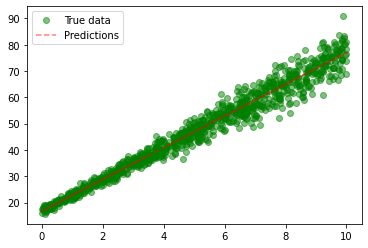

In [4]:
# this is simple implementation using pytorch to do deep learning on a linear model 


import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn
from torch.autograd import Variable

x=np.random.uniform(0,10,1000)
w=np.random.normal(6,0.5,1000)
b=np.random.normal(17,0.8,1000)

y=np.multiply(w,x)+b

x=x.astype(np.float32)
y=y.astype(np.float32)

x=x.reshape(-1,1)
y=y.reshape(-1,1)

x_train=torch.from_numpy(x)
y_train=torch.from_numpy(y)

print(x.shape)
print(y.shape)

class linearRegression(nn.Module):
    def __init__(self,inputDimension,outputDimension):
        super(linearRegression, self).__init__()
        self.linear = nn.Linear(inputDimension,outputDimension)  # input and output is 1 dimension

    def forward(self, x):
        out = self.linear(x)
        return out

learning_Rate=0.001
inputDimension, outputDimension=1,1
model = linearRegression(inputDimension,outputDimension) 

criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_Rate)
epoch=10000

for i in range(epoch):
    # Converting inputs and labels to Variable
    if torch.cuda.is_available(): # this is trying with GPU
        inputs = Variable(torch.from_numpy(x_train).cuda())
        labels = Variable(torch.from_numpy(y_train).cuda())
    else:
        inputs = Variable(x_train)
        labels = Variable(y_train)

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model.forward(inputs)

    # get loss for the predicted output
    loss = criterion(outputs, labels)

    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()

    # print('i {}, loss {}'.format(i, loss.item()))

with torch.no_grad(): # we don't need gradients in the testing phase
    if torch.cuda.is_available():
        predicted = model(Variable(torch.from_numpy(x_train).cuda())).cpu().data.numpy()
    else:
        predicted = model(Variable(x_train)).data.numpy()
    
m = model.linear.weight.data.numpy()[0][0]
b = model.linear.bias.data.numpy()[0]

print('Weight {}, intercept {}'.format(m, b))

plt.clf()
plt.plot(x, y, 'go', label='True data', alpha=0.5)
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5, c='r')
plt.legend(loc='best')
plt.show()




In [19]:
# import torch.nn as nn
# import torch.nn.functional as F

# class Model(nn.Module):
#     def __init__(self):
#         super(Model, self).__init__()
#         self.conv1 = nn.Conv2d(1, 20, 5)
#         self.conv2 = nn.Conv2d(20, 20, 5)

#     def forward(self, x):
#         x = F.relu(self.conv1(x))
#         return F.relu(self.conv2(x))

The above code is trying to declare an inherited class from nn.Module. 
"super" is trying to reinitilization of nn.linearRegression
use nn.Linear(1,1) to claim this is 1 to 1 dimension
forward is defining the forward function from input to output

CLASStorch.nn.Module[SOURCE]
Base class for all neural network modules.

Your models should also subclass this class.

Modules can also contain other Modules, allowing to nest them in a tree structure. You can assign the submodules as regular attributes:

